# JSON Based Data Exercise
#### Chuck Tucker

In [19]:
# import pandas and json packages
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

# run matplotlib inline
%matplotlib inline

In [5]:
# import the data as a dataframe
wbp = pd.read_json('../SB_Files/data_wrangling_json/data/world_bank_projects.json')

In [10]:
# view the dataframe info
wbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

## 1. Find the 10 Countries with the Most Projects

In [48]:
# filter the dataframe to relevant information
df = wbp[['countryshortname', 'project_name']]

In [65]:
# find the top 10 countries with the most projects using groupby
top10 = df.groupby('countryshortname')['project_name'].count().sort_values(ascending=False).head(10)
top10

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: project_name, dtype: int64

In [63]:
# clean up country label 'Yemen, Republic of'
xlabs = list(top10.index)
xlabs[4] = 'Yemen'

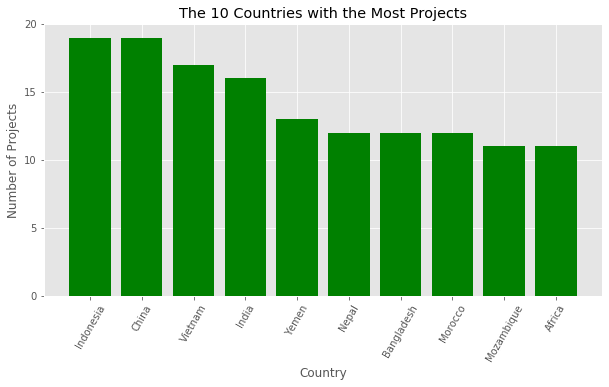

In [61]:
# format and display plot
plt.style.use('ggplot')
plt.bar(xlabs, top10, color='green')
plt.title('The 10 Countries with the Most Projects')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.ylim([0, 20])
plt.yticks([0, 5, 10, 15, 20])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(rotation=60)
plt.show()

#### 1. Solution
- Indonesia and China had the most projects with Mozambique and Africa rounding out the top 10

## 2. Find the Top 10 Major Project Themes

In [127]:
dict = wbp.mjtheme_namecode.to_dict()

{'code': '8', 'name': 'Human development'}

In [ ]:
df = pd.DataFrame

for key, value in dict.items():
    

In [153]:
x = json_normalize(wbp.mjtheme_namecode[1][1])
x

,code,name
0,6,Social protection and risk management


In [185]:
dict = {}
list1 = []
list2 = []
df = pd.DataFrame()

for i in range(len(wbp.mjtheme_namecode)):
    for y in range(len(wbp.mjtheme_namecode[i])):
        #print(json_normalize(wbp.mjtheme_namecode[i][y]))
        #df.iloc[i][0] = json_normalize(wbp.mjtheme_namecode[i][y]['code'])
        #df.iloc[i][1] = json_normalize(wbp.mjtheme_namecode[i][y]['name'])
        x = json_normalize(wbp.mjtheme_namecode[i][y])
        #dict[i] = {'code': x['code'], 'name': x['name']}
        #df.loc[i]['code'] = x['code']
        #df.loc[i]['name'] = x['name']
        list1.append(x['code'].values)
        list2.append(x['name'].values)

In [189]:
list_codes = []
list_names = []
for i in range(len(list1)):
    list_codes.append(list1[i][0])
    list_names.append(list2[i][0])

In [190]:
list_codes
dict = {'code': list_codes, 'name': list_names}

In [192]:
df = pd.DataFrame(dict)

In [194]:
df.head()
df.tail()

,code,name
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration
1498,4,Financial and private sector development
